# GRIP: The Sparks Foundation
## Data Science and Business Analytics Intern
### Author: Shazil Shaikh
### Task 4: Prediction Using Decision Tree Algortihm(Level: Intermediate)
#### Dataset: 'iris.csv' (https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)

### Importing libraries

In [9]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree

### importing data sets

In [3]:
df=pd.read_csv('iris.csv')
print('Dataset imported')
df.head()


Dataset imported


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### DATA PREPROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Observation**
- The data has no null values
- The data has no duplicates<br>
- No need for data encoding as required columns are numerical<br>
Hence it is clean i.e ready for model preparation

### MODEL 

In [10]:
# Creating X(feature) and y (labels)
X = df.drop('Species', axis=1)
y = df['Species']

In [11]:
# Splitting the data for tain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (120, 5)
Test shape:  (30, 5)


In [12]:
# call the model 
model = DecisionTreeClassifier()
# fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# make predictions on the test set
y_pred = model.predict(X_test)

### MODEL EVALUATION

In [14]:
# Evaluate the model
print(classification_report(y_test,y_pred))
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


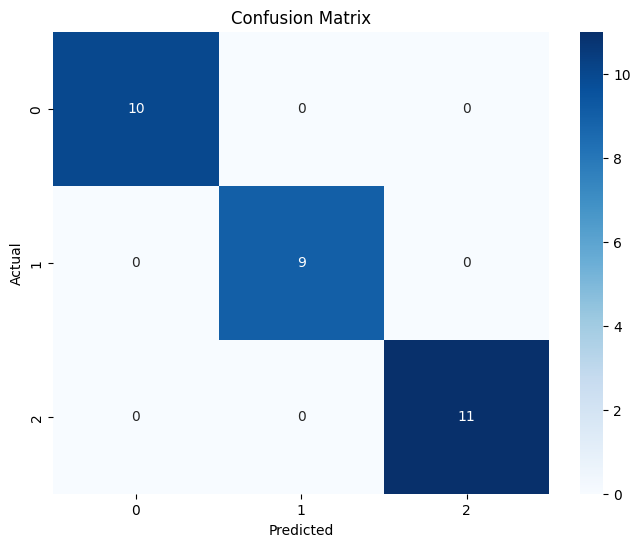

In [17]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Customize plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()

**OBSERVATION**
- It can be seen that the model has predicted all the test samples accurately and no impurity has been found in the model
- Thus, we can use this model and there is no need for tuning

**OBSERVATION**
- 

### VISUALIZING THE MODEL

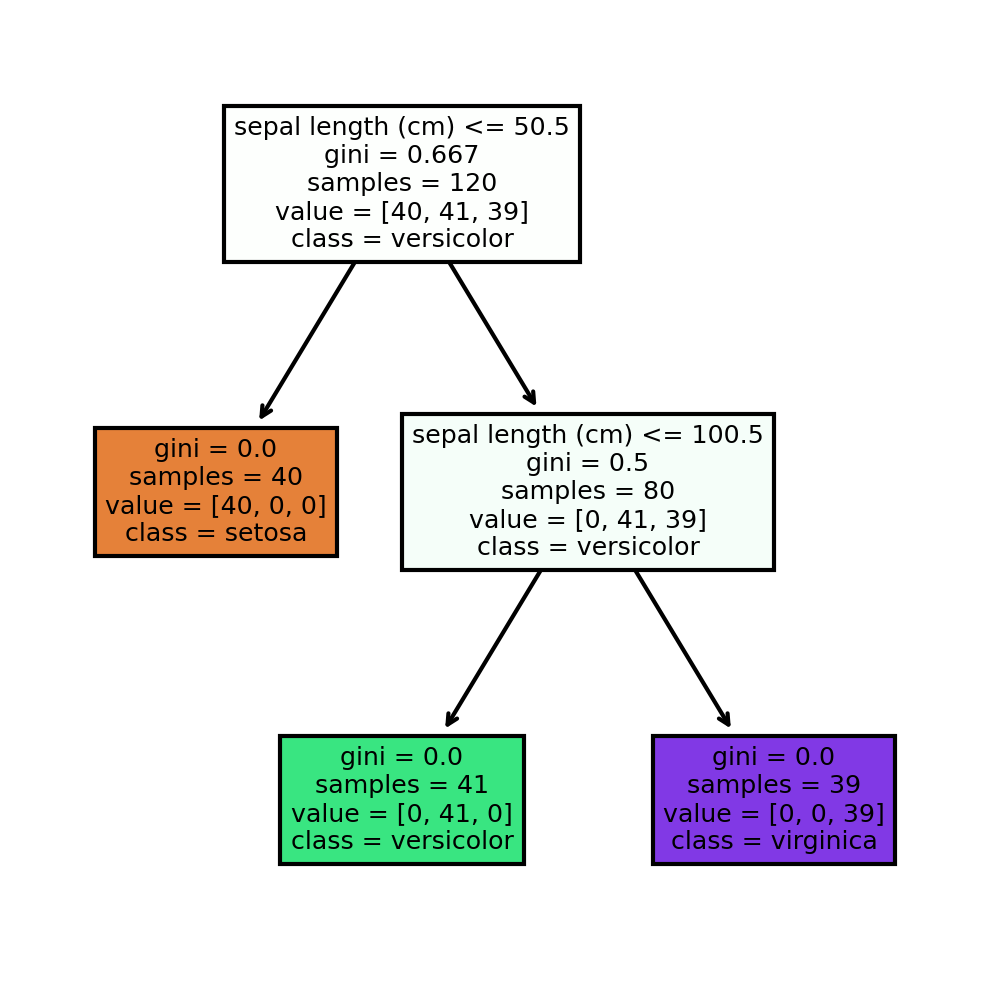

In [15]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [16]:
# Save the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./models/Decisiontree_01.dot',
                feature_names=X.columns,
                filled=True,
                rounded=True
                )